# Problem 1

to determine real, imaginary and the absolute value of the FFT of a Gaussian function 12πe-x22σ2 with σ=1 . 

What happens with FFT if you change σ to 2 and then to 4. 

Draw on one diagram the Gaussian functions with three values of σ and on the other diagram the absolute values of respective Fourier transforms. 

Explain the changes in the later functions. 

In [1]:
import scipy
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fft import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

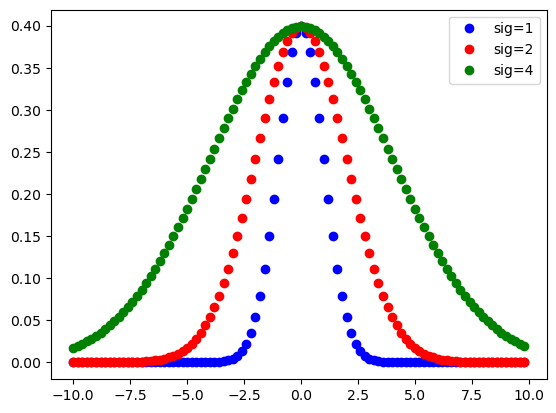

In [34]:
SAMPLE_RATE = 100  # Hertz
DURATION = 20
sig = 1

#define the gaussian function and plot

def gaus(sample_rate, sig=1):
    x = np.linspace(-1/2*DURATION, 1/2*DURATION, sample_rate, endpoint=False)
    y = ((2*np.pi)**(-1/2))*(np.exp((-x**2)/(2*sig**2)))
    return x, y

x, y = gaus(SAMPLE_RATE, 1)
plt.plot(x, y, 'bo')
x, y = gaus(SAMPLE_RATE, 2)
plt.plot(x, y, 'ro')
x, y = gaus(SAMPLE_RATE, 4)
plt.plot(x, y, 'go')
plt.legend(['sig=1','sig=2', 'sig=4'])
plt.show()

In [24]:
_, sig1 = gaus(SAMPLE_RATE, 1)
_, sig2 = gaus(SAMPLE_RATE, 2)
_, sig4 = gaus(SAMPLE_RATE, 4)

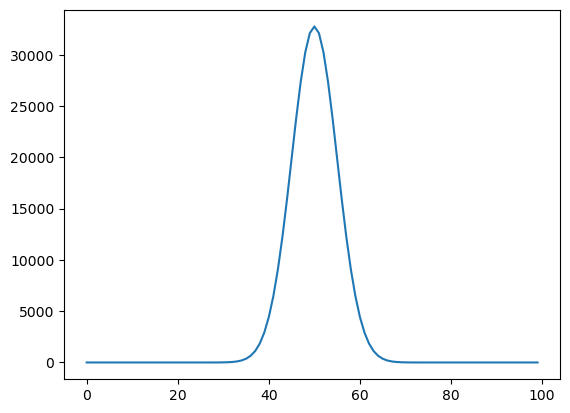

In [25]:
#normalize

sig1_n = np.int16((sig1 / sig1.max()) * 32767)
plt.plot(sig1_n[:1000])
plt.show()



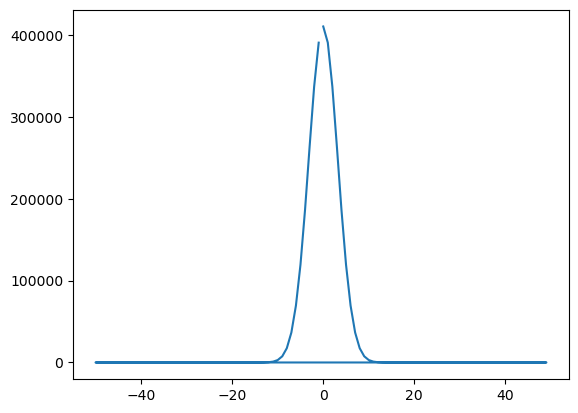

In [26]:
# Number of samples in normalized_tone

N = SAMPLE_RATE * DURATION

yf = fft(sig1_n)         # Fourier transform 
xf = fftfreq(int(N/20), 1 / SAMPLE_RATE)  # Points on the frequency axis

plt.plot(xf, np.abs(yf))          # We present the absolute value of this complex function
plt.show()

In [27]:
#normalize
sig2_n = np.int16((sig2 / sig2.max()) * 32767)
sig4_n = np.int16((sig4 / sig4.max()) * 32767)

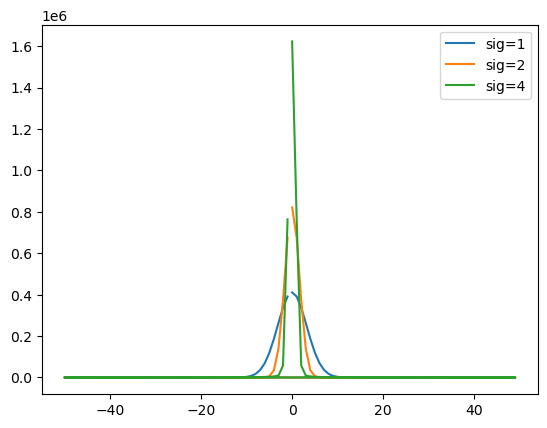

In [28]:
yf1 = fft(sig1_n)         # Fourier transform 
xf1 = fftfreq(int(N/20), 1 / SAMPLE_RATE)  # Points on the frequency axis

yf2 = fft(sig2_n)         # Fourier transform 
xf2 = fftfreq(int(N/20), 1 / SAMPLE_RATE)  # Points on the frequency axis

yf4 = fft(sig4_n)         # Fourier transform 
xf4 = fftfreq(int(N/20), 1 / SAMPLE_RATE)  # Points on the frequency axis

plt.plot(xf1, np.abs(yf1))          # We present the absolute value of this complex function
plt.plot(xf2, np.abs(yf2))   
plt.plot(xf4, np.abs(yf4))   
plt.legend(['sig=1','sig=2','sig=4'])
plt.show()

As we see above, the fourier transforms of the gaussian functions become narrower and steeper as sigma increases. This is expected based on the similarity theorem of fourier transforms which states that if a function becomes narrower in one domain, it must become broader in the other domain. 

# Problem 2. 

Download the dataset referred to in the lecture notes from https://storage.cloud.google.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz. 

Expand the archive into directory data_35. Move the directory with noise to another directory for safe keeping. Create a small directory and call it data. Move subdirectories for words: dog, right, follow, learn, and three to directory data. 

For files in the subdirectories of the above directory data generate NumPy arrays with respective MFCC values. 

Use 40 MFCC vectors per one wav file and 12 elements per MFCC vector. Do not use Deltas and energies. Create corresponding NumPy archives *.npy for all words in the directory data. 

Report on the volume of your npy files.

In [254]:
import tensorflow as tf
from preprocess import *
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from scipy.io import wavfile
import IPython.display as ipd
import tensorflow.keras.optimizers


In [37]:
import preprocess

In [4]:
dir(preprocess)

['DATA_PATH',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'get_labels',
 'get_train_test',
 'keras',
 'librosa',
 'load_dataset',
 'np',
 'os',
 'prepare_dataset',
 'save_data_to_array',
 'tf',
 'to_categorical',
 'tqdm',
 'train_test_split',
 'wav2mfcc']

In [5]:
# feature_dim_2 is the number of MFCC coefficients per 20 msec window.
# Use 40 MFCC vectors per one wav file and 12 elements per MFCC vector
feature_dim_2 = 12
path = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_35/data/'
# For selected number of windows per file we generate feature_dim_2 MFCC coefficients
# and then  save data to a numpy array file
save_data_to_array(max_len=feature_dim_2)

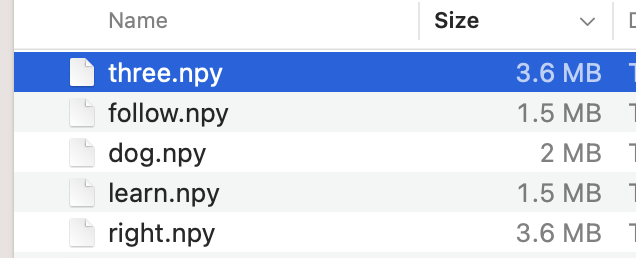

# Problem 3. 

When selecting train and validation set, please leave a small number of wav files from every class (word) for manual examination. 

You are working with words which have larger number of samples and you are using a larger number of MFFC vectors per wav file. Please report whether you achieved a higher accuracy than what is reported in the downloaded notebook lec11_speech_recognition_cnn.ipynb. 

You should make this run in Google Colab, unless you have a GPU card of your own. Just report whatever result you get. 

Examine your trained model with several of your set-a-side test files. Report on results

In [15]:
# Feature dimension
# This is the number of 20 msec windows we use to represent every word
feature_dim_1 = 20
channel = 1
epochs = 100
batch_size = 100
verbose = 1
num_classes = 5   # number of words used for training. 

In [16]:
X_train, X_test, y_train, y_test = get_train_test()

# # Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [17]:
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(10229, 20, 12, 1) (2558, 20, 12, 1)
(10229,) (2558,)


In [18]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size= 0.1, random_state=42, shuffle=True)

In [19]:
print(X_train.shape, X_val.shape)
print( y_train.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(9206, 20, 12, 1) (1023, 20, 12, 1)
(9206,) (1023,)
(2558, 20, 12, 1) (2558,)


In [24]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
y_val_hot = to_categorical(y_val)

In [258]:
#changing optimizer to improve performance on M2 mac

opt = tf.keras.optimizers.legacy.Adadelta(
    learning_rate=0.001,
    rho=0.95,
    epsilon=1e-07,
    name='Adadelta'
)

In [259]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

In [260]:
model = get_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 19, 11, 32)        160       
                                                                 
 conv2d_25 (Conv2D)          (None, 18, 10, 48)        6192      
                                                                 
 conv2d_26 (Conv2D)          (None, 17, 9, 120)        23160     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 4, 120)         0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 8, 4, 120)         0         
                                                                 
 flatten_8 (Flatten)         (None, 3840)              0         
                                                      

In [25]:
epochs=100
hist = model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_val, y_val_hot))

Epoch 1/100


2023-11-21 21:36:14.991865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - 5s 30ms/step - loss: 10.8161 - accuracy: 0.2030 - val_loss: 4.6003 - val_accuracy: 0.2131
Epoch 2/100
93/93 [==============================] - 2s 23ms/step - loss: 10.1883 - accuracy: 0.2088 - val_loss: 4.3315 - val_accuracy: 0.2180
Epoch 3/100
93/93 [==============================] - 2s 24ms/step - loss: 9.8207 - accuracy: 0.2094 - val_loss: 4.1875 - val_accuracy: 0.2317
Epoch 4/100
93/93 [==============================] - 2s 24ms/step - loss: 9.5922 - accuracy: 0.2134 - val_loss: 4.0592 - val_accuracy: 0.2317
Epoch 5/100
93/93 [==============================] - 2s 24ms/step - loss: 9.4245 - accuracy: 0.2134 - val_loss: 3.9945 - val_accuracy: 0.2414
Epoch 6/100
93/93 [==============================] - 2s 24ms/step - loss: 9.0676 - accuracy: 0.2231 - val_loss: 3.9368 - val_accuracy: 0.2473
Epoch 7/100
93/93 [==============================] - 2s 24ms/step - loss: 8.8431 - accuracy: 0.2297 - val_loss: 3.9048 - val_accuracy: 0.2551
Epoch 8/100
93/9

In [26]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

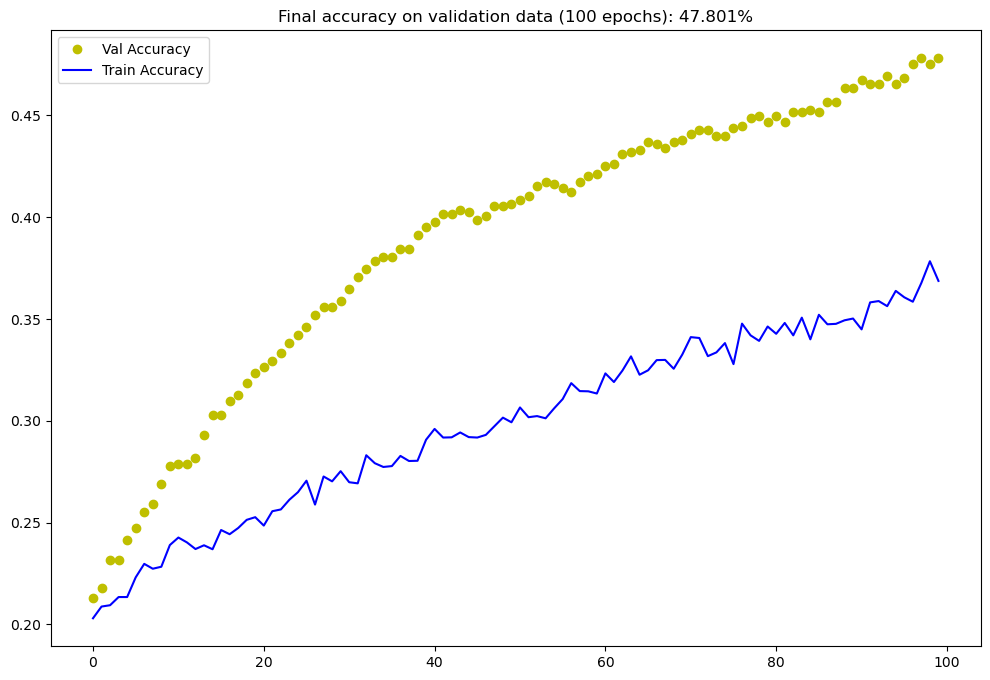

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(figsize=(12,8))
plt.plot(hist.history['val_accuracy'], 'yo', label='Val Accuracy')
plt.plot(hist.history['accuracy'], 'b-', label='Train Accuracy')
plt.title("Final accuracy on validation data (100 epochs): {:.3%}".format(hist.history['val_accuracy'][-1:][0]))
plt.legend(loc=2)
_ = plt.show()

In [28]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [29]:
epochs = 1200
hist = model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, 
                 validation_data=(X_val, y_val_hot),
                callbacks=[cp_callback])

Epoch 1/1200
93/93 [==============================] - 2s 25ms/step - loss: 7.4287 - accuracy: 0.3787 - val_loss: 3.2711 - val_accuracy: 0.4790
Epoch 2/1200
93/93 [==============================] - 2s 24ms/step - loss: 7.5824 - accuracy: 0.3654 - val_loss: 3.2194 - val_accuracy: 0.4829
Epoch 3/1200
93/93 [==============================] - 2s 24ms/step - loss: 7.5308 - accuracy: 0.3679 - val_loss: 3.1989 - val_accuracy: 0.4829
Epoch 4/1200
93/93 [==============================] - 2s 23ms/step - loss: 7.6695 - accuracy: 0.3649 - val_loss: 3.2388 - val_accuracy: 0.4829
Epoch 5/1200
93/93 [==============================] - 2s 25ms/step - loss: 7.6395 - accuracy: 0.3708 - val_loss: 3.2542 - val_accuracy: 0.4848
Epoch 6/1200
93/93 [==============================] - 2s 24ms/step - loss: 7.8081 - accuracy: 0.3693 - val_loss: 3.2930 - val_accuracy: 0.4809
Epoch 7/1200
93/93 [==============================] - 2s 24ms/step - loss: 7.5330 - accuracy: 0.3804 - val_loss: 3.3022 - val_accuracy: 0.4839

Epoch 58/1200
93/93 [==============================] - 2s 25ms/step - loss: 8.3340 - accuracy: 0.4203 - val_loss: 3.4009 - val_accuracy: 0.5318
Epoch 59/1200
93/93 [==============================] - 2s 24ms/step - loss: 8.3450 - accuracy: 0.4237 - val_loss: 3.4154 - val_accuracy: 0.5298
Epoch 60/1200
93/93 [==============================] - 2s 24ms/step - loss: 8.1227 - accuracy: 0.4280 - val_loss: 3.4531 - val_accuracy: 0.5279
Epoch 61/1200
93/93 [==============================] - 2s 24ms/step - loss: 7.9993 - accuracy: 0.4322 - val_loss: 3.4765 - val_accuracy: 0.5288
Epoch 62/1200
93/93 [==============================] - 2s 25ms/step - loss: 8.1949 - accuracy: 0.4278 - val_loss: 3.3875 - val_accuracy: 0.5337
Epoch 63/1200
93/93 [==============================] - 2s 24ms/step - loss: 8.1295 - accuracy: 0.4363 - val_loss: 3.3940 - val_accuracy: 0.5347
Epoch 64/1200
93/93 [==============================] - 2s 24ms/step - loss: 7.9428 - accuracy: 0.4426 - val_loss: 3.3926 - val_accuracy:

Epoch 115/1200
93/93 [==============================] - 2s 24ms/step - loss: 8.9515 - accuracy: 0.4611 - val_loss: 3.6933 - val_accuracy: 0.5699
Epoch 116/1200
93/93 [==============================] - 2s 24ms/step - loss: 8.7924 - accuracy: 0.4730 - val_loss: 3.7106 - val_accuracy: 0.5718
Epoch 117/1200
93/93 [==============================] - 2s 24ms/step - loss: 8.9707 - accuracy: 0.4686 - val_loss: 3.7457 - val_accuracy: 0.5630
Epoch 118/1200
93/93 [==============================] - 2s 24ms/step - loss: 9.0243 - accuracy: 0.4660 - val_loss: 3.7437 - val_accuracy: 0.5679
Epoch 119/1200
93/93 [==============================] - 2s 24ms/step - loss: 8.9681 - accuracy: 0.4703 - val_loss: 3.7999 - val_accuracy: 0.5572
Epoch 120/1200
93/93 [==============================] - 2s 24ms/step - loss: 9.1326 - accuracy: 0.4664 - val_loss: 3.7691 - val_accuracy: 0.5621
Epoch 121/1200
93/93 [==============================] - 2s 24ms/step - loss: 9.0502 - accuracy: 0.4659 - val_loss: 3.8023 - val_ac

93/93 [==============================] - 2s 24ms/step - loss: 9.9237 - accuracy: 0.5284 - val_loss: 4.0917 - val_accuracy: 0.6168
Epoch 228/1200
93/93 [==============================] - 2s 24ms/step - loss: 10.4224 - accuracy: 0.5160 - val_loss: 4.0776 - val_accuracy: 0.6207
Epoch 229/1200
93/93 [==============================] - 2s 24ms/step - loss: 10.2436 - accuracy: 0.5185 - val_loss: 4.0038 - val_accuracy: 0.6246
Epoch 230/1200
93/93 [==============================] - 2s 24ms/step - loss: 10.1721 - accuracy: 0.5199 - val_loss: 4.1095 - val_accuracy: 0.6188
Epoch 231/1200
93/93 [==============================] - 2s 24ms/step - loss: 10.5019 - accuracy: 0.5088 - val_loss: 4.1542 - val_accuracy: 0.6149
Epoch 232/1200
93/93 [==============================] - 2s 24ms/step - loss: 10.3874 - accuracy: 0.5174 - val_loss: 4.1708 - val_accuracy: 0.6188
Epoch 233/1200
93/93 [==============================] - 2s 24ms/step - loss: 10.2756 - accuracy: 0.5179 - val_loss: 4.1381 - val_accuracy: 0

93/93 [==============================] - 2s 25ms/step - loss: 11.3756 - accuracy: 0.5529 - val_loss: 5.0395 - val_accuracy: 0.6246
Epoch 340/1200
93/93 [==============================] - 2s 25ms/step - loss: 11.3441 - accuracy: 0.5516 - val_loss: 5.0211 - val_accuracy: 0.6266
Epoch 341/1200
93/93 [==============================] - 2s 25ms/step - loss: 11.5493 - accuracy: 0.5480 - val_loss: 5.0860 - val_accuracy: 0.6237
Epoch 342/1200
93/93 [==============================] - 2s 25ms/step - loss: 11.2275 - accuracy: 0.5481 - val_loss: 5.1353 - val_accuracy: 0.6227
Epoch 343/1200
93/93 [==============================] - 2s 25ms/step - loss: 11.3566 - accuracy: 0.5442 - val_loss: 5.0874 - val_accuracy: 0.6237
Epoch 344/1200
93/93 [==============================] - 2s 25ms/step - loss: 11.6624 - accuracy: 0.5433 - val_loss: 5.2154 - val_accuracy: 0.6188
Epoch 345/1200
93/93 [==============================] - 2s 25ms/step - loss: 11.5098 - accuracy: 0.5470 - val_loss: 5.4129 - val_accuracy: 

93/93 [==============================] - 2s 24ms/step - loss: 12.3937 - accuracy: 0.5578 - val_loss: 6.0668 - val_accuracy: 0.6364
Epoch 452/1200
93/93 [==============================] - 2s 24ms/step - loss: 12.8096 - accuracy: 0.5645 - val_loss: 6.1384 - val_accuracy: 0.6393
Epoch 453/1200
93/93 [==============================] - 2s 25ms/step - loss: 12.9054 - accuracy: 0.5673 - val_loss: 6.1736 - val_accuracy: 0.6364
Epoch 454/1200
93/93 [==============================] - 2s 24ms/step - loss: 12.3882 - accuracy: 0.5720 - val_loss: 6.2651 - val_accuracy: 0.6344
Epoch 455/1200
93/93 [==============================] - 2s 25ms/step - loss: 12.9321 - accuracy: 0.5642 - val_loss: 6.3127 - val_accuracy: 0.6344
Epoch 456/1200
93/93 [==============================] - 2s 25ms/step - loss: 12.7075 - accuracy: 0.5622 - val_loss: 6.4827 - val_accuracy: 0.6256
Epoch 457/1200
93/93 [==============================] - 2s 24ms/step - loss: 12.6372 - accuracy: 0.5637 - val_loss: 6.3610 - val_accuracy: 

93/93 [==============================] - 2s 24ms/step - loss: 13.4772 - accuracy: 0.5788 - val_loss: 7.5040 - val_accuracy: 0.6383
Epoch 564/1200
93/93 [==============================] - 2s 24ms/step - loss: 13.8802 - accuracy: 0.5822 - val_loss: 7.8806 - val_accuracy: 0.6344
Epoch 565/1200
93/93 [==============================] - 2s 24ms/step - loss: 13.5231 - accuracy: 0.5761 - val_loss: 7.6181 - val_accuracy: 0.6344
Epoch 566/1200
93/93 [==============================] - 2s 24ms/step - loss: 13.6380 - accuracy: 0.5813 - val_loss: 7.7218 - val_accuracy: 0.6373
Epoch 567/1200
93/93 [==============================] - 2s 24ms/step - loss: 13.7151 - accuracy: 0.5817 - val_loss: 7.7401 - val_accuracy: 0.6354
Epoch 568/1200
93/93 [==============================] - 2s 24ms/step - loss: 14.1327 - accuracy: 0.5780 - val_loss: 7.6667 - val_accuracy: 0.6364
Epoch 569/1200
93/93 [==============================] - 2s 24ms/step - loss: 14.0369 - accuracy: 0.5789 - val_loss: 7.9097 - val_accuracy: 

93/93 [==============================] - 2s 24ms/step - loss: 15.0823 - accuracy: 0.5876 - val_loss: 9.6122 - val_accuracy: 0.6168
Epoch 676/1200
93/93 [==============================] - 2s 24ms/step - loss: 15.7120 - accuracy: 0.5891 - val_loss: 9.6968 - val_accuracy: 0.6207
Epoch 677/1200
93/93 [==============================] - 2s 24ms/step - loss: 15.7614 - accuracy: 0.5864 - val_loss: 9.6328 - val_accuracy: 0.6188
Epoch 678/1200
93/93 [==============================] - 2s 24ms/step - loss: 15.4342 - accuracy: 0.5833 - val_loss: 9.2417 - val_accuracy: 0.6237
Epoch 679/1200
93/93 [==============================] - 2s 24ms/step - loss: 15.2332 - accuracy: 0.5914 - val_loss: 9.6297 - val_accuracy: 0.6188
Epoch 680/1200
93/93 [==============================] - 2s 24ms/step - loss: 14.8984 - accuracy: 0.5943 - val_loss: 9.7657 - val_accuracy: 0.6188
Epoch 681/1200
93/93 [==============================] - 2s 24ms/step - loss: 15.1637 - accuracy: 0.5946 - val_loss: 9.5893 - val_accuracy: 

Epoch 731/1200
93/93 [==============================] - 2s 24ms/step - loss: 16.4609 - accuracy: 0.5920 - val_loss: 10.8605 - val_accuracy: 0.6129
Epoch 732/1200
93/93 [==============================] - 2s 25ms/step - loss: 16.4557 - accuracy: 0.5909 - val_loss: 10.9177 - val_accuracy: 0.6090
Epoch 733/1200
93/93 [==============================] - 2s 25ms/step - loss: 16.1244 - accuracy: 0.5984 - val_loss: 10.8640 - val_accuracy: 0.6139
Epoch 734/1200
93/93 [==============================] - 2s 24ms/step - loss: 16.4533 - accuracy: 0.5923 - val_loss: 10.6682 - val_accuracy: 0.6149
Epoch 735/1200
93/93 [==============================] - 2s 24ms/step - loss: 16.2021 - accuracy: 0.5909 - val_loss: 10.4985 - val_accuracy: 0.6188
Epoch 736/1200
93/93 [==============================] - 2s 25ms/step - loss: 16.4974 - accuracy: 0.5848 - val_loss: 11.3188 - val_accuracy: 0.6080
Epoch 737/1200
93/93 [==============================] - 2s 24ms/step - loss: 16.5622 - accuracy: 0.5937 - val_loss: 11

Epoch 787/1200
93/93 [==============================] - 2s 23ms/step - loss: 16.5415 - accuracy: 0.5983 - val_loss: 12.0119 - val_accuracy: 0.6041
Epoch 788/1200
93/93 [==============================] - 2s 24ms/step - loss: 16.8446 - accuracy: 0.5975 - val_loss: 12.2245 - val_accuracy: 0.6031
Epoch 789/1200
93/93 [==============================] - 2s 23ms/step - loss: 16.7939 - accuracy: 0.5999 - val_loss: 12.4155 - val_accuracy: 0.5982
Epoch 790/1200
93/93 [==============================] - 2s 24ms/step - loss: 16.5183 - accuracy: 0.5980 - val_loss: 12.2946 - val_accuracy: 0.5973
Epoch 791/1200
93/93 [==============================] - 2s 24ms/step - loss: 16.7935 - accuracy: 0.5983 - val_loss: 12.7362 - val_accuracy: 0.5963
Epoch 792/1200
93/93 [==============================] - 2s 24ms/step - loss: 16.2820 - accuracy: 0.5979 - val_loss: 12.0496 - val_accuracy: 0.6090
Epoch 793/1200
93/93 [==============================] - 2s 24ms/step - loss: 17.4275 - accuracy: 0.5955 - val_loss: 12

Epoch 843/1200
93/93 [==============================] - 2s 24ms/step - loss: 17.3355 - accuracy: 0.6044 - val_loss: 13.5927 - val_accuracy: 0.5914
Epoch 844/1200
93/93 [==============================] - 2s 25ms/step - loss: 17.8651 - accuracy: 0.6034 - val_loss: 13.1838 - val_accuracy: 0.5934
Epoch 845/1200
93/93 [==============================] - 2s 24ms/step - loss: 17.3588 - accuracy: 0.5952 - val_loss: 13.2986 - val_accuracy: 0.5924
Epoch 846/1200
93/93 [==============================] - 2s 25ms/step - loss: 17.6875 - accuracy: 0.6022 - val_loss: 13.1735 - val_accuracy: 0.5924
Epoch 847/1200
93/93 [==============================] - 2s 24ms/step - loss: 17.6350 - accuracy: 0.5991 - val_loss: 13.1671 - val_accuracy: 0.5982
Epoch 848/1200
93/93 [==============================] - 2s 25ms/step - loss: 17.6832 - accuracy: 0.5958 - val_loss: 13.2522 - val_accuracy: 0.5934
Epoch 849/1200
93/93 [==============================] - 2s 25ms/step - loss: 17.2226 - accuracy: 0.5992 - val_loss: 13

Epoch 899/1200
93/93 [==============================] - 2s 24ms/step - loss: 18.1956 - accuracy: 0.5992 - val_loss: 14.4203 - val_accuracy: 0.5885
Epoch 900/1200
93/93 [==============================] - 2s 25ms/step - loss: 18.3605 - accuracy: 0.5953 - val_loss: 14.0456 - val_accuracy: 0.5924
Epoch 901/1200
93/93 [==============================] - 2s 24ms/step - loss: 18.2584 - accuracy: 0.5988 - val_loss: 13.9943 - val_accuracy: 0.5914
Epoch 902/1200
93/93 [==============================] - 2s 25ms/step - loss: 17.7049 - accuracy: 0.6008 - val_loss: 14.0591 - val_accuracy: 0.5953
Epoch 903/1200
93/93 [==============================] - 2s 24ms/step - loss: 18.2603 - accuracy: 0.6011 - val_loss: 14.2089 - val_accuracy: 0.5914
Epoch 904/1200
93/93 [==============================] - 2s 24ms/step - loss: 18.5885 - accuracy: 0.5948 - val_loss: 13.8799 - val_accuracy: 0.5943
Epoch 905/1200
93/93 [==============================] - 2s 25ms/step - loss: 18.2080 - accuracy: 0.6040 - val_loss: 13

Epoch 955/1200
93/93 [==============================] - 2s 25ms/step - loss: 18.5803 - accuracy: 0.6069 - val_loss: 14.7081 - val_accuracy: 0.6022
Epoch 956/1200
93/93 [==============================] - 2s 24ms/step - loss: 18.5741 - accuracy: 0.6018 - val_loss: 15.2316 - val_accuracy: 0.5924
Epoch 957/1200
93/93 [==============================] - 2s 24ms/step - loss: 18.3442 - accuracy: 0.6054 - val_loss: 15.3547 - val_accuracy: 0.5885
Epoch 958/1200
93/93 [==============================] - 2s 25ms/step - loss: 18.6915 - accuracy: 0.6016 - val_loss: 15.4079 - val_accuracy: 0.5894
Epoch 959/1200
93/93 [==============================] - 2s 24ms/step - loss: 18.7036 - accuracy: 0.6098 - val_loss: 14.8162 - val_accuracy: 0.5963
Epoch 960/1200
93/93 [==============================] - 2s 24ms/step - loss: 18.4272 - accuracy: 0.6030 - val_loss: 14.7001 - val_accuracy: 0.5973
Epoch 961/1200
93/93 [==============================] - 2s 24ms/step - loss: 18.6733 - accuracy: 0.6088 - val_loss: 15

93/93 [==============================] - 2s 25ms/step - loss: 20.2573 - accuracy: 0.6060 - val_loss: 17.4805 - val_accuracy: 0.5806
Epoch 1066/1200
93/93 [==============================] - 2s 24ms/step - loss: 19.6966 - accuracy: 0.6139 - val_loss: 17.0240 - val_accuracy: 0.5875
Epoch 1067/1200
93/93 [==============================] - 2s 25ms/step - loss: 20.1473 - accuracy: 0.6156 - val_loss: 17.6161 - val_accuracy: 0.5826
Epoch 1068/1200
93/93 [==============================] - 2s 24ms/step - loss: 19.6877 - accuracy: 0.6051 - val_loss: 17.5466 - val_accuracy: 0.5846
Epoch 1069/1200
93/93 [==============================] - 2s 25ms/step - loss: 20.1396 - accuracy: 0.6054 - val_loss: 16.7618 - val_accuracy: 0.5894
Epoch 1070/1200
93/93 [==============================] - 2s 24ms/step - loss: 20.0498 - accuracy: 0.6045 - val_loss: 17.3807 - val_accuracy: 0.5855
Epoch 1071/1200
93/93 [==============================] - 2s 24ms/step - loss: 19.8740 - accuracy: 0.6037 - val_loss: 17.3500 - v

93/93 [==============================] - 2s 24ms/step - loss: 20.9866 - accuracy: 0.6015 - val_loss: 17.9399 - val_accuracy: 0.5943
Epoch 1176/1200
93/93 [==============================] - 2s 25ms/step - loss: 21.0781 - accuracy: 0.6082 - val_loss: 17.6883 - val_accuracy: 0.5963
Epoch 1177/1200
93/93 [==============================] - 2s 24ms/step - loss: 20.8067 - accuracy: 0.6104 - val_loss: 17.9461 - val_accuracy: 0.5973
Epoch 1178/1200
93/93 [==============================] - 2s 24ms/step - loss: 20.8478 - accuracy: 0.6141 - val_loss: 18.6946 - val_accuracy: 0.5865
Epoch 1179/1200
93/93 [==============================] - 2s 24ms/step - loss: 20.6173 - accuracy: 0.6068 - val_loss: 18.6740 - val_accuracy: 0.5826
Epoch 1180/1200
93/93 [==============================] - 2s 25ms/step - loss: 21.7490 - accuracy: 0.6091 - val_loss: 18.8306 - val_accuracy: 0.5846
Epoch 1181/1200
93/93 [==============================] - 2s 24ms/step - loss: 20.9679 - accuracy: 0.6113 - val_loss: 18.7823 - v

In [36]:
model.save('speech.keras')

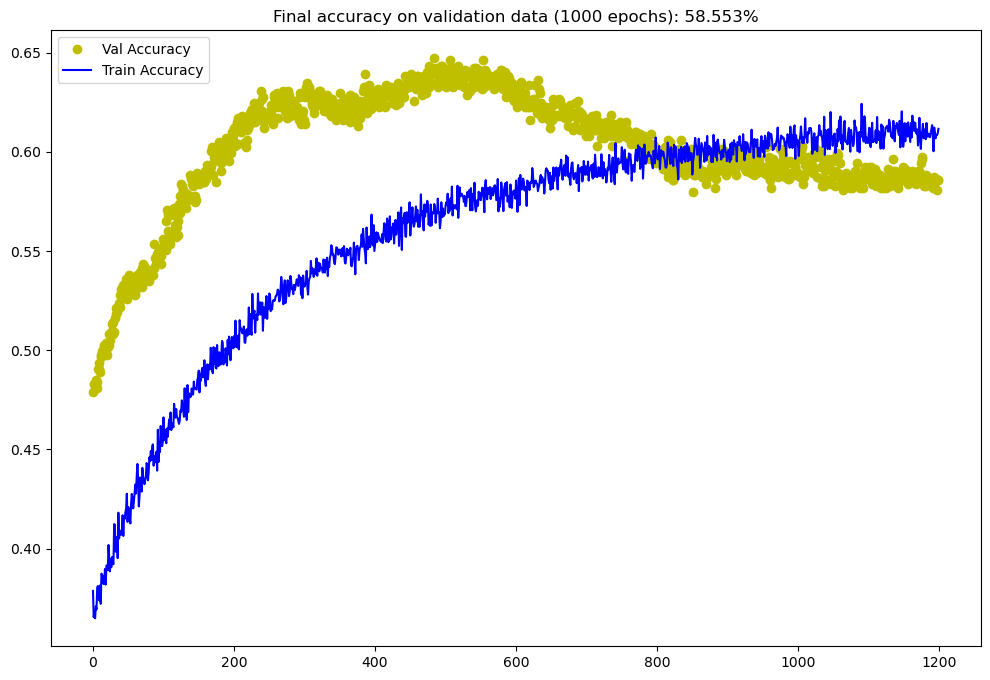

In [30]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['val_accuracy'], 'yo', label='Val Accuracy')
plt.plot(hist.history['accuracy'], 'b-', label='Train Accuracy')
plt.title("Final accuracy on validation data (1000 epochs): {:.3%}".format(hist.history['val_accuracy'][-1:][0]))
plt.legend(loc=2)
_ = plt.show()

In [137]:
filepath = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_35/data/learn/0d6d7360_nohash_0.wav'

In [138]:
# manual inspection of "learn"
sample = wav2mfcc(filepath)
#     sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
#     return get_labels()[0][
#             np.argmax(model.predict(sample_reshaped))
#     ]

In [312]:
filepath = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_35/data/learn/0d6d7360_nohash_0.wav'
new_sample_rate = 16000
samples, sample_rate = librosa.load(filepath)
ipd.Audio(samples, rate=sample_rate)

In [139]:
sample.shape

(20, 40)

In [140]:
wave, sr = librosa.load(filepath, mono=True, sr=None)
wave = wave[::3]
mfcc = librosa.feature.mfcc(y=wave, sr=16000, n_mfcc=20, n_fft=512)
pad = np.pad(mfcc, pad_width=[1])
pad = pad[:20,:12]

In [145]:
sample_reshaped = pad.reshape(1, feature_dim_1, feature_dim_2, channel)

In [146]:
model.predict(sample_reshaped)

1/1 [==============================] - 0s 19ms/step


array([[1.4616058e-33, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [150]:
get_labels()[0][np.argmax(model.predict(sample_reshaped))]

1/1 [==============================] - 0s 18ms/step


'dog'

the model incorrectly predicted this sample as 'dog'.

In [159]:
# inspect another file

filepath = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_35/data/three/042a8dde_nohash_1.wav'
wave, sr = librosa.load(filepath, mono=True, sr=None)
wave = wave[::3]
mfcc = librosa.feature.mfcc(y=wave, sr=16000, n_mfcc=20, n_fft=512)
pad = np.pad(mfcc, pad_width=[1])
pad = pad[:20,:12]
sample_reshaped = pad.reshape(1, feature_dim_1, feature_dim_2, channel)

In [311]:
filepath = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_35/data/three/042a8dde_nohash_1.wav'
new_sample_rate = 16000
samples, sample_rate = librosa.load(filepath)
ipd.Audio(samples, rate=sample_rate)

In [160]:
get_labels()[0][np.argmax(model.predict(sample_reshaped))]

1/1 [==============================] - 0s 78ms/step


'dog'

The model also incorrectly predicted this sample as dog as well

In [170]:
# inspect another file

filepath = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_35/data/right/91942e89_nohash_1.wav'
wave, sr = librosa.load(filepath, mono=True, sr=None)
wave = wave[::3]
mfcc = librosa.feature.mfcc(y=wave, sr=16000, n_mfcc=20, n_fft=512)
pad = np.pad(mfcc, pad_width=[1])
pad = pad[:20,:12]
sample_reshaped = pad.reshape(1, feature_dim_1, feature_dim_2, channel)

In [313]:
filepath = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_35/data/right/91942e89_nohash_1.wav'
new_sample_rate = 16000
samples, sample_rate = librosa.load(filepath)
ipd.Audio(samples, rate=sample_rate)

In [171]:
get_labels()[0][np.argmax(model.predict(sample_reshaped))]

1/1 [==============================] - 0s 19ms/step


'right'

The model correctly predicted this word

In [134]:
#evaluate model on all test data

model.evaluate(X_test, y_test_hot)

80/80 [==============================] - 1s 7ms/step - loss: 17.2781 - accuracy: 0.5915


[17.278125762939453, 0.5914777517318726]

With a test accuracy of only 59%, we see that the model does not perform as well on the test data as in the original file.  This was not expected due to the increased number of training samples and the increase in mfcc lengths that we used compared to the original file. 

# Problem 4

Notebook lec11_speech_recognition_cnn.ipynb has images with the validation and training accuracy. Curves are inverted. Usually, the training accuracy is higher.  A possible reason for the inversion of the training accuracy and the validation accuracy is that we have too many samples in the validation set that are very similar to samples in the training set.  

If you examine your data directories you will see that some speakers contributed up to 5 samples of the same word. 

SciKit-learn’s train_test_split() function takes random files from each directory. As the result, we have files for the same speaker falling in both training and the validation set. As a consequence the validation set has sound files which are very similar to some files in the training set and the validation accuracy is reported as very high. 

You could easily make train and validation sets that do not share speakers. You could write a program or you could do it manually. Just take the first 80 (70)% of files and place them in the training set. Make sure the break is not splitting any one speaker into two groups. Run your training with new training and validation sets and report whether the curves flipped their positions. !

In [179]:
import shutil

In [178]:
#create directories for sorted files

# The path to the directory of the original dataset
original_dataset_dir = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_35/data'

# The directory where we will
# store our smaller dataset
base_dir = 'data_sorted'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#create train directories
for label in labels:
    label_dir = os.path.join(train_dir, label)
    os.mkdir(label_dir)
    
#create val directories
for label in labels:
    label_dir = os.path.join(validation_dir, label)
    os.mkdir(label_dir)
    
#create test directories
for label in labels:
    label_dir = os.path.join(test_dir, label)
    os.mkdir(label_dir)

In [188]:
# save files from original label datasets into sorted train data set

#create sorted training set
for label in labels:
    file_dir = os.path.join(original_dataset_dir, label)
    files = os.listdir(file_dir)
    label_files = [x for x in files if x.endswith("0.wav")]

    
    for value in label_files:
        src = os.path.join(file_dir, value)
        dst = os.path.join(train_dir, label, value)
        shutil.copyfile(src, dst)

In [190]:
# look up number of remaining files
for label in labels:
    file_dir = os.path.join(original_dataset_dir, label)
    files = os.listdir(file_dir)
    label_files = [x for x in files if not x.endswith("0.wav")]
    print(label, len(label_files))

right 2169
learn 1067
dog 563
follow 1106
three 2140


In [195]:
#create sorted validation set

val_split = 0.3

for label in labels:
    file_dir = os.path.join(original_dataset_dir, label)
    files = os.listdir(file_dir)
    label_files = [x for x in files if not x.endswith("0.wav")]
    length = len(label_files)
    val_leng = length*val_split
    
    i = 0

    while  i < val_leng:
        wav = np.random.choice(label_files)
        src = os.path.join(file_dir, wav)
        dst = os.path.join(validation_dir, label, wav)
        shutil.copyfile(src, dst)
        i += 1

right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6
right 6


dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
dog 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
follow 6
f

three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6
three 6


In [196]:
#create sorted test set

val_split = 0.3

for label in labels:
    file_dir = os.path.join(original_dataset_dir, label)
    files = os.listdir(file_dir)
    label_files = [x for x in files if not x.endswith("0.wav")]
    length = len(label_files)
    val_leng = length*(1-val_split)
    
    i = 0
    while i < val_leng:
        wav = np.random.choice(label_files)
        src = os.path.join(file_dir, wav)
        dst = os.path.join(test_dir, label, wav)
        shutil.copyfile(src, dst)
        i += 1

In [200]:
label_indices = np.arange(0, len(labels))

labels

# label_indices 
# to_categorical(label_indices)

['right', 'learn', 'dog', 'follow', 'three']

In [230]:
# create training npy files

path = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_sorted/train/'

for label in labels:
    # Init mfcc vectors
    mfcc_vectors = []
    
    wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
#         if wavfile.endswith("0.wav"):
            mfcc = wav2mfcc(wavfile, max_len=12)
            mfcc_vectors.append(mfcc)
    np.save(label + '_train.npy', mfcc_vectors)

Saving vectors of label - 'three': 100%|██████████████████████████████████████████████████████████████| 1587/1587 [00:03<00:00, 437.79it/s]


In [231]:
# create validation npy files

path = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_sorted/validation/'

for label in labels:
    # Init mfcc vectors
    mfcc_vectors = []
    
    wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = wav2mfcc(wavfile, max_len=12)
            mfcc_vectors.append(mfcc)
    np.save(label + '_val.npy', mfcc_vectors)

Saving vectors of label - 'three': 100%|████████████████████████████████████████████████████████████████| 544/544 [00:01<00:00, 440.37it/s]


In [286]:
# create test npy files

path = '/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_sorted/test/'

for label in labels:
    # Init mfcc vectors
    mfcc_vectors = []
    
    wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            
            try:
                mfcc = wav2mfcc(wavfile, max_len=12)
                mfcc_vectors.append(mfcc)
                
            except: print(label, wavfile, "cannot process")
    np.save(label + '_test.npy', mfcc_vectors)

Saving vectors of label - 'right':  20%|███████▌                              | 215/1079 [00:00<00:02, 305.91it/s]

right /Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/data_sorted/test/right/.DS_Store cannot process


Saving vectors of label - 'three': 100%|█████████████████████████████████████| 1072/1072 [00:03<00:00, 308.30it/s]


In [268]:
for label in labels:
    print(label, os.listdir(path + '/' + label))


right ['8e523821_nohash_2.wav', '439c84f4_nohash_1.wav', '97f4c236_nohash_2.wav', 'fac74f6a_nohash_1.wav', '742d6431_nohash_3.wav', 'fdb5155e_nohash_2.wav', '229978fd_nohash_3.wav', '3d794813_nohash_1.wav', '686d030b_nohash_1.wav', '409c962a_nohash_1.wav', 'ffd2ba2f_nohash_4.wav', 'dbaf8fc6_nohash_2.wav', '712e4d58_nohash_2.wav', '18f8afd5_nohash_3.wav', '1b42b551_nohash_1.wav', 'a9b574b3_nohash_1.wav', 'e3e0f145_nohash_3.wav', 'c1d39ce8_nohash_6.wav', 'd98dd124_nohash_4.wav', '3a33d3a4_nohash_2.wav', '9aa21fa9_nohash_1.wav', 'cce7416f_nohash_4.wav', '62f05757_nohash_1.wav', 'ff2b842e_nohash_3.wav', '7fd25f7c_nohash_2.wav', '3cc595de_nohash_4.wav', 'ddedba85_nohash_3.wav', 'f810e799_nohash_1.wav', '2927c601_nohash_4.wav', '0c5027de_nohash_1.wav', 'f104f742_nohash_1.wav', '96d8bb6f_nohash_3.wav', 'eb3f7d82_nohash_1.wav', '0d2bcf9d_nohash_2.wav', 'b528edb3_nohash_4.wav', '06076b6b_nohash_2.wav', 'b76f6088_nohash_3.wav', '2cf28b70_nohash_1.wav', 'b5cf6ea8_nohash_5.wav', 'df1d5024_nohash_2

In [233]:
#create training data sets

# Getting first arrays
X = np.load(labels[0] + '_train.npy')
y = np.zeros(X.shape[0])

# Append all of the dataset into one single array, same goes for y
for i, label in enumerate(labels[1:]):
    x = np.load(label + '_train.npy')
    X = np.vstack((X, x))
    y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

assert X.shape[0] == len(y)

X_train_sorted = X
y_train_sorted = y

In [234]:
# # Reshaping to perform 2D convolution
X_train_sorted = X_train_sorted.reshape(X_train_sorted.shape[0], feature_dim_1, feature_dim_2, channel)


y_train_sorted_hot = to_categorical(y_train_sorted)


In [235]:
print(X_train_sorted.shape)
print(y_train_sorted.shape)

(5742, 20, 12, 1)
(5742,)


In [236]:
#create sorted validation data sets

# Getting first arrays
X = np.load(labels[0] + '_val.npy')
y = np.zeros(X.shape[0])

# Append all of the dataset into one single array, same goes for y
for i, label in enumerate(labels[1:]):
    x = np.load(label + '_val.npy')
    X = np.vstack((X, x))
    y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

  
assert X.shape[0] == len(y)

X_val_sorted = X
y_val_sorted = y

In [237]:
# # Reshaping to perform 2D convolution
X_val_sorted = X_val_sorted.reshape(X_val_sorted.shape[0], feature_dim_1, feature_dim_2, channel)


y_val_sorted_hot = to_categorical(y_val_sorted)


In [238]:
print(X_val_sorted.shape)
print(y_val_sorted.shape)

(1810, 20, 12, 1)
(1810,)


In [304]:
#create sorted test data sets

# Getting first arrays
X = np.load(labels[0] + '_test.npy')
y = np.zeros(X.shape[0])

# Append all of the dataset into one single array, same goes for y
for i, label in enumerate(labels[1:]):
    x = np.load(label + '_test.npy')
    X = np.vstack((X, x))
    y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

  
assert X.shape[0] == len(y)

X_test_sorted = X
y_test_sorted = y

In [306]:
print(X_test_sorted.shape)
print(y_test_sorted.shape)

(3542, 40, 12)
(3542,)


In [307]:
# # Reshaping to perform 2D convolution
X_test_sorted = X_test_sorted[:,:20,:]
X_test_sorted = X_test_sorted.reshape(X_test_sorted.shape[0], feature_dim_1, feature_dim_2, channel)


y_test_sorted_hot = to_categorical(y_test_sorted)


In [308]:
print(X_test_sorted.shape)
print(y_test_sorted_hot.shape)

(3542, 20, 12, 1)
(3542, 5)


In [239]:
#create model checkpoint callback
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback2 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

In [261]:
#train model
epochs = 1200
hist = model.fit(X_train_sorted, y_train_sorted_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, 
                 validation_data=(X_val_sorted, y_val_sorted_hot),
                callbacks=[cp_callback2])

Epoch 1/1200
58/58 [==============================] - 2s 28ms/step - loss: 9.9095 - accuracy: 0.1984 - val_loss: 4.5129 - val_accuracy: 0.2099
Epoch 2/1200
58/58 [==============================] - 1s 25ms/step - loss: 9.4095 - accuracy: 0.2160 - val_loss: 4.5866 - val_accuracy: 0.1867
Epoch 3/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.9985 - accuracy: 0.2250 - val_loss: 4.7443 - val_accuracy: 0.1713
Epoch 4/1200
58/58 [==============================] - 1s 24ms/step - loss: 8.8247 - accuracy: 0.2212 - val_loss: 4.9705 - val_accuracy: 0.1552
Epoch 5/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.8688 - accuracy: 0.2220 - val_loss: 5.1504 - val_accuracy: 0.1575
Epoch 6/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.5070 - accuracy: 0.2391 - val_loss: 5.2751 - val_accuracy: 0.1602
Epoch 7/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.6131 - accuracy: 0.2372 - val_loss: 5.4219 - val_accuracy: 0.1580

Epoch 58/1200
58/58 [==============================] - 2s 27ms/step - loss: 8.5532 - accuracy: 0.2957 - val_loss: 5.6421 - val_accuracy: 0.2779
Epoch 59/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.5672 - accuracy: 0.3034 - val_loss: 5.6046 - val_accuracy: 0.2801
Epoch 60/1200
58/58 [==============================] - 2s 27ms/step - loss: 8.7063 - accuracy: 0.2994 - val_loss: 5.5828 - val_accuracy: 0.2823
Epoch 61/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.6801 - accuracy: 0.2952 - val_loss: 5.5657 - val_accuracy: 0.2812
Epoch 62/1200
58/58 [==============================] - 2s 27ms/step - loss: 8.6744 - accuracy: 0.3001 - val_loss: 5.5383 - val_accuracy: 0.2867
Epoch 63/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.6288 - accuracy: 0.3112 - val_loss: 5.5669 - val_accuracy: 0.2878
Epoch 64/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.6202 - accuracy: 0.3018 - val_loss: 5.5809 - val_accuracy:

Epoch 115/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.5690 - accuracy: 0.3647 - val_loss: 5.4811 - val_accuracy: 0.3939
Epoch 116/1200
58/58 [==============================] - 1s 26ms/step - loss: 8.6231 - accuracy: 0.3657 - val_loss: 5.4916 - val_accuracy: 0.3895
Epoch 117/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.4482 - accuracy: 0.3730 - val_loss: 5.4665 - val_accuracy: 0.3923
Epoch 118/1200
58/58 [==============================] - 1s 26ms/step - loss: 8.4211 - accuracy: 0.3697 - val_loss: 5.5341 - val_accuracy: 0.3884
Epoch 119/1200
58/58 [==============================] - 1s 26ms/step - loss: 8.6057 - accuracy: 0.3535 - val_loss: 5.4827 - val_accuracy: 0.3945
Epoch 120/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.6199 - accuracy: 0.3548 - val_loss: 5.4581 - val_accuracy: 0.3989
Epoch 121/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.6542 - accuracy: 0.3615 - val_loss: 5.4224 - val_ac

58/58 [==============================] - 1s 25ms/step - loss: 8.3624 - accuracy: 0.4565 - val_loss: 6.1925 - val_accuracy: 0.4845
Epoch 228/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.3116 - accuracy: 0.4453 - val_loss: 6.2171 - val_accuracy: 0.4829
Epoch 229/1200
58/58 [==============================] - 1s 26ms/step - loss: 8.3956 - accuracy: 0.4425 - val_loss: 6.1886 - val_accuracy: 0.4834
Epoch 230/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.2806 - accuracy: 0.4565 - val_loss: 6.2800 - val_accuracy: 0.4823
Epoch 231/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.6207 - accuracy: 0.4458 - val_loss: 6.2125 - val_accuracy: 0.4840
Epoch 232/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.5995 - accuracy: 0.4397 - val_loss: 6.2816 - val_accuracy: 0.4829
Epoch 233/1200
58/58 [==============================] - 1s 26ms/step - loss: 8.5556 - accuracy: 0.4429 - val_loss: 6.4407 - val_accuracy: 0.4768


58/58 [==============================] - 2s 26ms/step - loss: 8.8975 - accuracy: 0.5035 - val_loss: 7.3815 - val_accuracy: 0.5083
Epoch 340/1200
58/58 [==============================] - 1s 26ms/step - loss: 8.9642 - accuracy: 0.4909 - val_loss: 7.3241 - val_accuracy: 0.5149
Epoch 341/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.6638 - accuracy: 0.4995 - val_loss: 7.3287 - val_accuracy: 0.5116
Epoch 342/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.7718 - accuracy: 0.4925 - val_loss: 7.3377 - val_accuracy: 0.5122
Epoch 343/1200
58/58 [==============================] - 1s 26ms/step - loss: 8.4615 - accuracy: 0.5077 - val_loss: 7.2021 - val_accuracy: 0.5221
Epoch 344/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.8054 - accuracy: 0.5000 - val_loss: 7.3105 - val_accuracy: 0.5155
Epoch 345/1200
58/58 [==============================] - 1s 25ms/step - loss: 8.6509 - accuracy: 0.4988 - val_loss: 7.2883 - val_accuracy: 0.5171


58/58 [==============================] - 2s 27ms/step - loss: 9.0237 - accuracy: 0.5430 - val_loss: 8.2446 - val_accuracy: 0.5254
Epoch 452/1200
58/58 [==============================] - 2s 27ms/step - loss: 9.3077 - accuracy: 0.5249 - val_loss: 8.3860 - val_accuracy: 0.5166
Epoch 453/1200
58/58 [==============================] - 1s 25ms/step - loss: 9.2122 - accuracy: 0.5329 - val_loss: 8.3211 - val_accuracy: 0.5210
Epoch 454/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.8989 - accuracy: 0.5432 - val_loss: 8.4270 - val_accuracy: 0.5182
Epoch 455/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.9215 - accuracy: 0.5338 - val_loss: 8.3216 - val_accuracy: 0.5199
Epoch 456/1200
58/58 [==============================] - 2s 26ms/step - loss: 8.9568 - accuracy: 0.5378 - val_loss: 8.3982 - val_accuracy: 0.5160
Epoch 457/1200
58/58 [==============================] - 2s 26ms/step - loss: 9.1140 - accuracy: 0.5420 - val_loss: 8.4471 - val_accuracy: 0.5144


58/58 [==============================] - 2s 26ms/step - loss: 10.0572 - accuracy: 0.5475 - val_loss: 9.4705 - val_accuracy: 0.5370
Epoch 564/1200
58/58 [==============================] - 2s 26ms/step - loss: 10.4144 - accuracy: 0.5406 - val_loss: 10.1028 - val_accuracy: 0.5177
Epoch 565/1200
58/58 [==============================] - 2s 26ms/step - loss: 9.6243 - accuracy: 0.5559 - val_loss: 9.6259 - val_accuracy: 0.5343
Epoch 566/1200
58/58 [==============================] - 2s 27ms/step - loss: 10.2374 - accuracy: 0.5401 - val_loss: 9.5948 - val_accuracy: 0.5348
Epoch 567/1200
58/58 [==============================] - 2s 26ms/step - loss: 9.4589 - accuracy: 0.5484 - val_loss: 9.5659 - val_accuracy: 0.5348
Epoch 568/1200
58/58 [==============================] - 2s 26ms/step - loss: 9.8762 - accuracy: 0.5519 - val_loss: 9.4319 - val_accuracy: 0.5387
Epoch 569/1200
58/58 [==============================] - 2s 27ms/step - loss: 10.1479 - accuracy: 0.5441 - val_loss: 9.6738 - val_accuracy: 0.

Epoch 675/1200
58/58 [==============================] - 2s 28ms/step - loss: 10.7525 - accuracy: 0.5514 - val_loss: 10.4507 - val_accuracy: 0.5530
Epoch 676/1200
58/58 [==============================] - 2s 28ms/step - loss: 10.7188 - accuracy: 0.5630 - val_loss: 10.7438 - val_accuracy: 0.5409
Epoch 677/1200
58/58 [==============================] - 2s 27ms/step - loss: 10.7095 - accuracy: 0.5617 - val_loss: 10.7082 - val_accuracy: 0.5425
Epoch 678/1200
58/58 [==============================] - 2s 28ms/step - loss: 10.6153 - accuracy: 0.5583 - val_loss: 10.9665 - val_accuracy: 0.5326
Epoch 679/1200
58/58 [==============================] - 2s 27ms/step - loss: 10.5868 - accuracy: 0.5556 - val_loss: 11.0439 - val_accuracy: 0.5315
Epoch 680/1200
58/58 [==============================] - 2s 27ms/step - loss: 10.3958 - accuracy: 0.5575 - val_loss: 10.5404 - val_accuracy: 0.5453
Epoch 681/1200
58/58 [==============================] - 2s 26ms/step - loss: 10.6493 - accuracy: 0.5566 - val_loss: 10

Epoch 731/1200
58/58 [==============================] - 2s 28ms/step - loss: 11.4463 - accuracy: 0.5650 - val_loss: 11.2024 - val_accuracy: 0.5409
Epoch 732/1200
58/58 [==============================] - 2s 28ms/step - loss: 10.6972 - accuracy: 0.5667 - val_loss: 11.4845 - val_accuracy: 0.5387
Epoch 733/1200
58/58 [==============================] - 2s 27ms/step - loss: 10.8758 - accuracy: 0.5641 - val_loss: 11.4810 - val_accuracy: 0.5348
Epoch 734/1200
58/58 [==============================] - 2s 28ms/step - loss: 11.5008 - accuracy: 0.5637 - val_loss: 11.6378 - val_accuracy: 0.5343
Epoch 735/1200
58/58 [==============================] - 2s 28ms/step - loss: 10.8230 - accuracy: 0.5698 - val_loss: 11.6398 - val_accuracy: 0.5304
Epoch 736/1200
58/58 [==============================] - 2s 28ms/step - loss: 10.7596 - accuracy: 0.5745 - val_loss: 11.6317 - val_accuracy: 0.5359
Epoch 737/1200
58/58 [==============================] - 2s 26ms/step - loss: 10.8874 - accuracy: 0.5718 - val_loss: 11

Epoch 787/1200
58/58 [==============================] - 2s 28ms/step - loss: 11.1282 - accuracy: 0.5798 - val_loss: 11.9464 - val_accuracy: 0.5326
Epoch 788/1200
58/58 [==============================] - 2s 27ms/step - loss: 11.1673 - accuracy: 0.5731 - val_loss: 12.0821 - val_accuracy: 0.5376
Epoch 789/1200
58/58 [==============================] - 2s 28ms/step - loss: 11.0584 - accuracy: 0.5674 - val_loss: 12.0289 - val_accuracy: 0.5365
Epoch 790/1200
58/58 [==============================] - 2s 28ms/step - loss: 10.8809 - accuracy: 0.5695 - val_loss: 11.8974 - val_accuracy: 0.5414
Epoch 791/1200
58/58 [==============================] - 2s 27ms/step - loss: 10.9073 - accuracy: 0.5754 - val_loss: 11.9313 - val_accuracy: 0.5337
Epoch 792/1200
58/58 [==============================] - 2s 28ms/step - loss: 11.5652 - accuracy: 0.5615 - val_loss: 11.6874 - val_accuracy: 0.5414
Epoch 793/1200
58/58 [==============================] - 2s 27ms/step - loss: 11.2191 - accuracy: 0.5643 - val_loss: 11

Epoch 843/1200
58/58 [==============================] - 2s 28ms/step - loss: 11.2142 - accuracy: 0.5794 - val_loss: 12.5377 - val_accuracy: 0.5365
Epoch 844/1200
58/58 [==============================] - 2s 28ms/step - loss: 11.6026 - accuracy: 0.5759 - val_loss: 12.4789 - val_accuracy: 0.5387
Epoch 845/1200
58/58 [==============================] - 2s 27ms/step - loss: 11.5564 - accuracy: 0.5655 - val_loss: 12.9707 - val_accuracy: 0.5287
Epoch 846/1200
58/58 [==============================] - 2s 27ms/step - loss: 11.4683 - accuracy: 0.5758 - val_loss: 12.6558 - val_accuracy: 0.5354
Epoch 847/1200
58/58 [==============================] - 2s 27ms/step - loss: 11.8722 - accuracy: 0.5669 - val_loss: 12.4556 - val_accuracy: 0.5420
Epoch 848/1200
58/58 [==============================] - 2s 28ms/step - loss: 11.7292 - accuracy: 0.5738 - val_loss: 12.8067 - val_accuracy: 0.5287
Epoch 849/1200
58/58 [==============================] - 2s 27ms/step - loss: 11.6036 - accuracy: 0.5679 - val_loss: 12

Epoch 899/1200
58/58 [==============================] - 1s 24ms/step - loss: 12.0687 - accuracy: 0.5723 - val_loss: 13.5798 - val_accuracy: 0.5249
Epoch 900/1200
58/58 [==============================] - 1s 26ms/step - loss: 12.3487 - accuracy: 0.5712 - val_loss: 13.5879 - val_accuracy: 0.5287
Epoch 901/1200
58/58 [==============================] - 1s 25ms/step - loss: 11.8685 - accuracy: 0.5724 - val_loss: 13.8490 - val_accuracy: 0.5260
Epoch 902/1200
58/58 [==============================] - 1s 26ms/step - loss: 12.2725 - accuracy: 0.5724 - val_loss: 13.3458 - val_accuracy: 0.5376
Epoch 903/1200
58/58 [==============================] - 2s 26ms/step - loss: 11.8170 - accuracy: 0.5731 - val_loss: 13.8736 - val_accuracy: 0.5227
Epoch 904/1200
58/58 [==============================] - 2s 27ms/step - loss: 12.2212 - accuracy: 0.5751 - val_loss: 13.5443 - val_accuracy: 0.5287
Epoch 905/1200
58/58 [==============================] - 1s 25ms/step - loss: 11.6830 - accuracy: 0.5695 - val_loss: 13

Epoch 955/1200
58/58 [==============================] - 1s 26ms/step - loss: 12.0504 - accuracy: 0.5730 - val_loss: 13.6712 - val_accuracy: 0.5348
Epoch 956/1200
58/58 [==============================] - 1s 26ms/step - loss: 12.1664 - accuracy: 0.5812 - val_loss: 13.9990 - val_accuracy: 0.5265
Epoch 957/1200
58/58 [==============================] - 2s 26ms/step - loss: 12.1395 - accuracy: 0.5763 - val_loss: 14.4617 - val_accuracy: 0.5204
Epoch 958/1200
58/58 [==============================] - 1s 26ms/step - loss: 12.1520 - accuracy: 0.5754 - val_loss: 14.3340 - val_accuracy: 0.5227
Epoch 959/1200
58/58 [==============================] - 1s 26ms/step - loss: 11.9434 - accuracy: 0.5784 - val_loss: 14.1643 - val_accuracy: 0.5215
Epoch 960/1200
58/58 [==============================] - 1s 26ms/step - loss: 12.1072 - accuracy: 0.5707 - val_loss: 14.4162 - val_accuracy: 0.5144
Epoch 961/1200
58/58 [==============================] - 1s 25ms/step - loss: 12.2073 - accuracy: 0.5742 - val_loss: 14

58/58 [==============================] - 1s 26ms/step - loss: 12.8774 - accuracy: 0.5846 - val_loss: 15.4707 - val_accuracy: 0.5116
Epoch 1066/1200
58/58 [==============================] - 2s 26ms/step - loss: 12.6858 - accuracy: 0.5822 - val_loss: 15.6619 - val_accuracy: 0.5105
Epoch 1067/1200
58/58 [==============================] - 1s 25ms/step - loss: 12.6059 - accuracy: 0.5860 - val_loss: 15.2482 - val_accuracy: 0.5282
Epoch 1068/1200
58/58 [==============================] - 2s 26ms/step - loss: 12.2822 - accuracy: 0.5871 - val_loss: 14.8925 - val_accuracy: 0.5320
Epoch 1069/1200
58/58 [==============================] - 1s 25ms/step - loss: 12.2631 - accuracy: 0.5817 - val_loss: 14.8845 - val_accuracy: 0.5365
Epoch 1070/1200
58/58 [==============================] - 1s 25ms/step - loss: 12.5586 - accuracy: 0.5848 - val_loss: 15.6413 - val_accuracy: 0.5116
Epoch 1071/1200
58/58 [==============================] - 2s 26ms/step - loss: 12.8727 - accuracy: 0.5817 - val_loss: 15.0500 - v

58/58 [==============================] - 2s 26ms/step - loss: 13.2491 - accuracy: 0.5754 - val_loss: 16.2457 - val_accuracy: 0.5221
Epoch 1176/1200
58/58 [==============================] - 2s 27ms/step - loss: 13.0978 - accuracy: 0.5798 - val_loss: 16.8583 - val_accuracy: 0.4994
Epoch 1177/1200
58/58 [==============================] - 2s 27ms/step - loss: 12.6036 - accuracy: 0.5914 - val_loss: 16.6451 - val_accuracy: 0.4983
Epoch 1178/1200
58/58 [==============================] - 2s 26ms/step - loss: 12.8785 - accuracy: 0.5846 - val_loss: 17.1385 - val_accuracy: 0.4923
Epoch 1179/1200
58/58 [==============================] - 1s 26ms/step - loss: 13.0952 - accuracy: 0.5848 - val_loss: 16.1615 - val_accuracy: 0.5105
Epoch 1180/1200
58/58 [==============================] - 2s 26ms/step - loss: 13.2620 - accuracy: 0.5838 - val_loss: 16.0366 - val_accuracy: 0.5238
Epoch 1181/1200
58/58 [==============================] - 2s 27ms/step - loss: 12.8470 - accuracy: 0.5843 - val_loss: 15.9586 - v

In [262]:
model.save('speech2.keras')

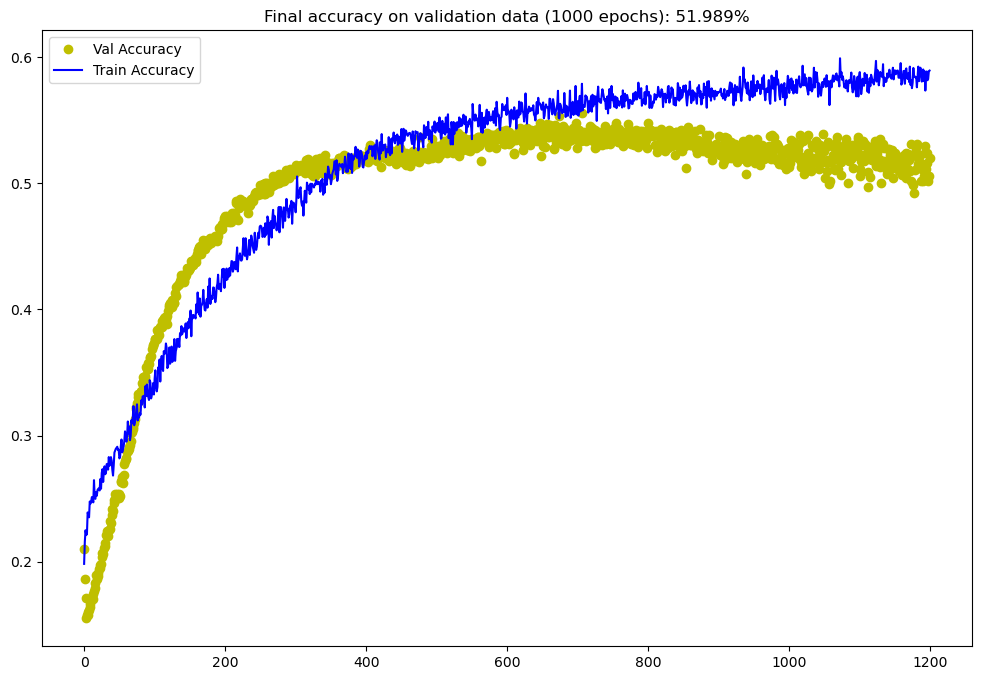

In [263]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['val_accuracy'], 'yo', label='Val Accuracy')
plt.plot(hist.history['accuracy'], 'b-', label='Train Accuracy')
plt.title("Final accuracy on validation data (1000 epochs): {:.3%}".format(hist.history['val_accuracy'][-1:][0]))
plt.legend(loc=2)
_ = plt.show()

As seen above, sorting the training and validation files to remove duplicate speakers in the training set does help to alleviate the pattern seen previously wherein the validation accuracy is always higher than the training accuracy.  Here, we see that the training accuracy initially is higher than that of validation, then is briefly lower than validation accuracy before again returning to above validation accuracy.  Unexpectedly, the performance of the model overall is still quite low and generally in line with the initial attempt. 

In [309]:
model.evaluate(X_test_sorted, y_test_sorted_hot)

111/111 [==============================] - 1s 7ms/step - loss: 16.3648 - accuracy: 0.5155


[16.364822387695312, 0.5155279636383057]